## References

https://cookbook.chromadb.dev/running/running-chroma/

https://docs.trychroma.com/guides#running-chroma-in-client/server-mode

https://docs.trychroma.com/reference/py-client#httpclient

## Running Chroma in client/server mode

### Run Local Server 

https://cookbook.chromadb.dev/running/running-chroma/

#### Chroma CLI

Chroma CLI¶
The simplest way to run Chroma locally is via the Chroma cli which is part of the core Chroma package.

Prerequisites:

Python 3.8 to 3.11 - Download Python | Python.org

```bash
pip install chromadb
chroma run --host localhost --port 8000 --path ./my_chroma_data
```

`--host` The host to which to listen to, by default it is [localhost](http://localhost:8000/docs) , but if you want to expose it to your entire network then you can specify `0.0.0.0``

`--port` The port on which to listen to, by default this is 8000.

`--path` The path where to persist your Chroma data locally.

In [1]:
# chroma run --host localhost --port 8000 --path ./http_client_db


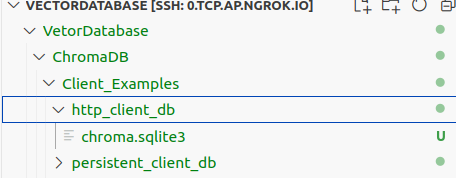

### Creat HTTP Client

https://github.com/chroma-core/chroma/blob/main/chromadb/__init__.py#L156
```python
def HttpClient(
    host: str = "localhost",
    port: int = 8000,
    ssl: bool = False,
    headers: Optional[Dict[str, str]] = None,
    settings: Optional[Settings] = None,
    tenant: str = DEFAULT_TENANT,
    database: str = DEFAULT_DATABASE,
) -> ClientAPI:
    """
    Creates a client that connects to a remote Chroma server. This supports
    many clients connecting to the same server, and is the recommended way to
    use Chroma in production.

    Args:
        host: The hostname of the Chroma server. Defaults to "localhost".
        port: The port of the Chroma server. Defaults to "8000".
        ssl: Whether to use SSL to connect to the Chroma server. Defaults to False.
        headers: A dictionary of headers to send to the Chroma server. Defaults to {}.
        settings: A dictionary of settings to communicate with the chroma server.
        tenant: The tenant to use for this client. Defaults to the default tenant.
        database: The database to use for this client. Defaults to the default database.
    """
```

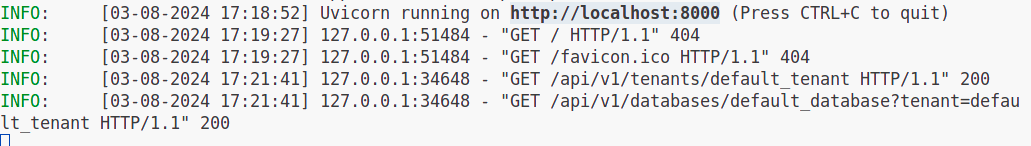

In [7]:
import chromadb
http_client = chromadb.HttpClient(host='localhost', port=8000)


In [8]:
http_client.count_collections()

0

In [9]:
http_client.list_collections()

[]

### Create Collection

https://github.com/chroma-core/chroma/blob/main/chromadb/api/__init__.py#L430
```python
def get_or_create_collection(
        self,
        name: str,
        configuration: Optional[CollectionConfiguration] = None,
        metadata: Optional[CollectionMetadata] = None,
        embedding_function: Optional[
            EmbeddingFunction[Embeddable]
        ] = ef.DefaultEmbeddingFunction(),  # type: ignore
        data_loader: Optional[DataLoader[Loadable]] = None,
    ) -> Collection:
        model = self._server.get_or_create_collection(
            name=name,
            metadata=metadata,
            tenant=self.tenant,
            database=self.database,
            configuration=configuration,
        )
        return Collection(
            client=self._server,
            model=model,
            embedding_function=embedding_function,
            data_loader=data_loader,
        )
```

In [10]:
http_collection = http_client.get_or_create_collection('http_collection')
http_collection

Collection(id=0b4e9bd5-8abf-4c3b-bb7e-5c2a9a33eba7, name=http_collection)

### Add Text Data to Collection

In [11]:
ids = ['id_1', 'id_2', 'id_3']
documents = ['This is document1', 'This is document2', 'This is document3']

http_collection.add(
    ids=ids,
    documents=documents 
)

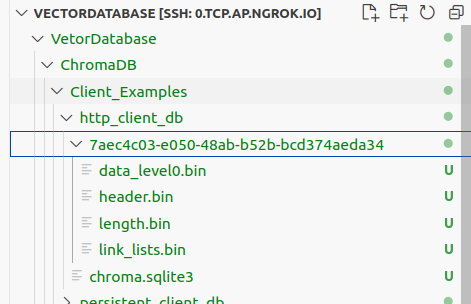

### Query

https://github.com/chroma-core/chroma/blob/main/chromadb/api/models/Collection.py#L141
```python
    def query(
        self,
        query_embeddings: Optional[  # type: ignore[type-arg]
            Union[
                OneOrMany[Embedding],
                OneOrMany[np.ndarray],
            ]
        ] = None,
        query_texts: Optional[OneOrMany[Document]] = None,
        query_images: Optional[OneOrMany[Image]] = None,
        query_uris: Optional[OneOrMany[URI]] = None,
        n_results: int = 10,
        where: Optional[Where] = None,
        where_document: Optional[WhereDocument] = None,
        include: Include = ["metadatas", "documents", "distances"],
    ) -> QueryResult:
        """Get the n_results nearest neighbor embeddings for provided query_embeddings or query_texts.

        Args:
            query_embeddings: The embeddings to get the closes neighbors of. Optional.
            query_texts: The document texts to get the closes neighbors of. Optional.
            query_images: The images to get the closes neighbors of. Optional.
            n_results: The number of neighbors to return for each query_embedding or query_texts. Optional.
            where: A Where type dict used to filter results by. E.g. `{"$and": [{"color" : "red"}, {"price": {"$gte": 4.20}}]}`. Optional.
            where_document: A WhereDocument type dict used to filter by the documents. E.g. `{$contains: {"text": "hello"}}`. Optional.
            include: A list of what to include in the results. Can contain `"embeddings"`, `"metadatas"`, `"documents"`, `"distances"`. Ids are always included. Defaults to `["metadatas", "documents", "distances"]`. Optional.

        Returns:
            QueryResult: A QueryResult object containing the results.

        Raises:
            ValueError: If you don't provide either query_embeddings, query_texts, or query_images
            ValueError: If you provide both query_embeddings and query_texts
            ValueError: If you provide both query_embeddings and query_images
            ValueError: If you provide both query_texts and query_images

        """
```

In [12]:
query_text = ['Find document1', 'Find document3']
results = http_collection.query(query_texts=query_text)
results

{'ids': [['id_1', 'id_2', 'id_3'], ['id_3', 'id_1', 'id_2']],
 'distances': [[0.723681433474943, 0.8896140904398314, 1.0471905099808319],
  [0.5841960303876956, 0.9867350685794922, 0.988745215647633]],
 'embeddings': None,
 'metadatas': [[None, None, None], [None, None, None]],
 'documents': [['This is document1', 'This is document2', 'This is document3'],
  ['This is document3', 'This is document1', 'This is document2']],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

## Load Client from created http database

Restart the kernel

In [10]:
import chromadb
loaded_http_client = chromadb.HttpClient(host='localhost', port=8000)


In [11]:
loaded_http_client.count_collections()

1

In [12]:
loaded_http_client.list_collections()

[Collection(id=0b4e9bd5-8abf-4c3b-bb7e-5c2a9a33eba7, name=http_collection)]

In [13]:
loaded_http_collection = loaded_http_client.get_collection('http_collection')


In [15]:
loaded_http_collection.count()

3